In [1]:
import os 
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

In [2]:
# Load and preprocess the data
def load_and_preprocess_data(data):
    images = []
    labels = []
    for label, image_paths in data.items():
        for path in image_paths:
            img = cv2.imread(str(path))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB format
            img = cv2.resize(img, (224, 224))  # Resize image to VGG16 input size
            images.append(img)
            labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [3]:
# Load data
path = pathlib.Path(r"C:\Users\akshi\OneDrive\Desktop\gmu\ait 736\mid project\kvasir-dataset\kvasir-dataset")

In [4]:
dyed_ifted_polyps = list(path.glob('dyed-lifted-polyps/*'))
dyed_resection_margins = list(path.glob('dyed-resection-margins/*'))
esophagitis = list(path.glob('esophagitis/*'))
normal_cecum = list(path.glob('normal-cecum/*'))
normal_pylorus = list(path.glob('normal-pylorus/*'))
normal_z_line = list(path.glob('normal-z-line/*'))
polyps = list(path.glob('polyps/*'))
ulcerative_colitis = list(path.glob('ulcerative-colitis/*'))

In [5]:
data = {
    'dyed-lifted-polyps' : dyed_ifted_polyps ,
    'dyed-resection-margins' : dyed_resection_margins,
    'esophagitis' : esophagitis,
    'normal-cecum' : normal_cecum,
    'normal-pylorus' : normal_pylorus,
    'normal-z-line' : normal_z_line,
    'polyps' : polyps,
    'ulcerative-colitis' : ulcerative_colitis
}

polys_labels = {
    0:'dyed-lifted-polyps',
    1:'dyed-resection-margins',
    2:'esophagitis',
    3:'normal-cecum',
    4:'normal-pylorus',
    5:'normal-z-line',
    6:'polyps',
    7:'ulcerative-colitis'
}

In [6]:
images, labels = load_and_preprocess_data(data)

In [7]:
# Split the data into training, validation, and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [8]:
train_data_res = resnet_preprocess_input(train_data)
val_data_res = resnet_preprocess_input(val_data)
test_data_res = resnet_preprocess_input(test_data)

In [9]:
# Convert string labels to numerical labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded = label_encoder.transform(test_labels)

In [10]:
from keras.applications import ResNet50

In [11]:
# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Create the model
model_res = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  # Adjust the output units based on the number of classes
])

In [12]:
# Compile the model
model_res.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_res = model_res.fit(train_data_res, train_labels_encoded, epochs=10, batch_size=32, validation_data=(val_data_res, val_labels_encoded))

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.5246 - loss: 16.6553 - val_accuracy: 0.7297 - val_loss: 0.6278
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.7064 - loss: 0.7968 - val_accuracy: 0.8109 - val_loss: 0.5089
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.7403 - loss: 0.6289 - val_accuracy: 0.7906 - val_loss: 0.5630
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.7833 - loss: 0.6080 - val_accuracy: 0.8297 - val_loss: 0.4435
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.7714 - loss: 0.5750 - val_accuracy: 0.8328 - val_loss: 0.5343
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.8200 - loss: 0.4612 - val_accuracy: 0.8203 - val_loss: 0.5284
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.8194 - loss: 0.4600 - val_accuracy: 0.8516 - val_loss: 0.4263
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.8314 - loss: 0.4189 - val_accuracy: 0.8500 - 

In [13]:
# Evaluate the model
test_loss, test_acc = model_res.evaluate(test_data_res, test_labels_encoded)
print(f'Test Accuracy: {test_acc}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8831 - loss: 0.3950
Test Accuracy: 0.8737499713897705


In [14]:
# Model summary
model_res.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (32, 7, 7, 2048)       │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 100352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 256)              │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 8)                │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,664,986 (384.01 MB)

 Trainable params: 25,692,424 (98.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 51,384,850 (196.02 MB)

25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step


<Figure size 800x800 with 0 Axes>

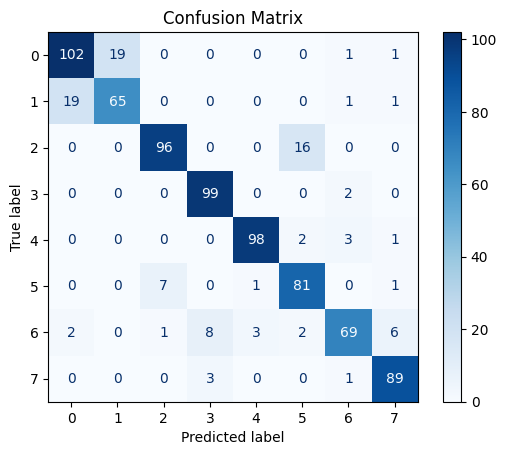

In [18]:
# Generate confusion matrix
predictions = model_res.predict(test_data_res)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels_encoded, predicted_labels)
classes = [str(i) for i in range(8)]  # Assuming you have 8 classes

# Plot confusion matrix
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [19]:
from sklearn.metrics import precision_score, recall_score

# Compute Precision and Recall for multiclass classification
precision = precision_score(test_labels_encoded, predictions.argmax(axis=1), average='macro')
recall = recall_score(test_labels_encoded, predictions.argmax(axis=1), average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 0.8730016308010576
Recall: 0.8724952276221769


ROC AUC Score: 0.9891276576654061


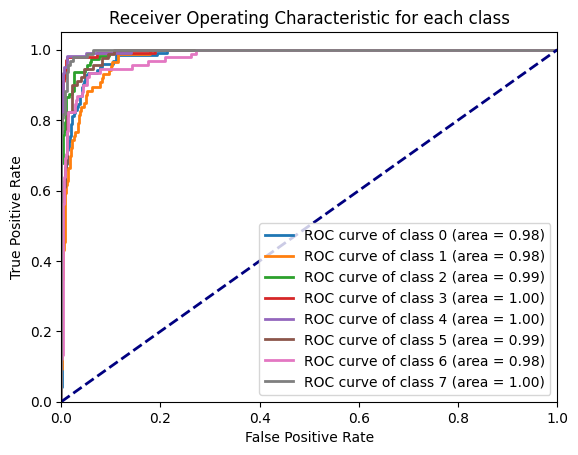

In [20]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Binarize the true labels
y_test_binarized = label_binarize(test_labels_encoded, classes=np.unique(test_labels_encoded))

# Calculate AUC for each class
roc_auc = roc_auc_score(y_test_binarized, predictions, multi_class='ovr')

print(f'ROC AUC Score: {roc_auc}')

# Plot ROC curve for each class
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

In [21]:
# Define the number of classes
num_classes = 8  # Update with the number of classes in your dataset

# Define a function to create the ResNet50 model
def create_resnet_model():
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Perform cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = []

for fold, (train_index, val_index) in enumerate(skf.split(train_data_res, train_labels_encoded)):
    print(f"Fold {fold + 1}/{num_folds}")
    
    # Create ResNet50 model
    model = create_resnet_model()
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model
    history = model.fit(train_data_res[train_index], train_labels_encoded[train_index], epochs=10, batch_size=32, validation_data=(train_data_res[val_index], train_labels_encoded[val_index]), verbose=1)
    
    # Evaluate the model on validation data
    val_loss, val_acc = model.evaluate(train_data_res[val_index], train_labels_encoded[val_index], verbose=0)
    print(f"Validation Accuracy: {val_acc}")
    cv_scores.append(val_acc)

# Calculate and print the mean cross-validation score
mean_cv_score = np.mean(cv_scores)
print(f"Mean Cross-Validation Accuracy: {mean_cv_score}")

Fold 1/5
Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.4560 - loss: 23.0536 - val_accuracy: 0.6973 - val_loss: 0.6320
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.6650 - loss: 0.9747 - val_accuracy: 0.8145 - val_loss: 0.6179
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.7343 - loss: 0.7120 - val_accuracy: 0.8281 - val_loss: 0.4700
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.7344 - loss: 0.6684 - val_accuracy: 0.8418 - val_loss: 0.5172
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.7627 - loss: 0.5490 - val_accuracy: 0.8301 - val_loss: 0.4783
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.7865 - loss: 0.5565 - val_accuracy: 0.8652 - val_loss: 0.4821
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.7990 - loss: 0.4984 - val_accuracy: 0.8652 - val_loss: 0.4270
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.8080 - loss: 0.5029 - val_accuracy: 